# Introduction
The purpose of this project is to compare the predictive performance and computational cost of models built in H2O and TensorFlow. To that end, logistic regression, gradient boosting and deep learning models were built in H2O and TensorFlow. The models were trained and tested on a Taiwanese credit default dataset.

### Import Files

In [ ]:
# Only necessary in Google Colaboratory
# from google.colab import files
# uploaded = files.upload()

# Data Exploration

### Configure Environment

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

%matplotlib inline
figSize = plt.rcParams["figure.figsize"]
figSize[0] = 30
figSize[1] = 20
plt.rcParams["figure.figsize"] = figSize

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

### Ingest Data

In [ ]:
creditData = pd.read_csv("taiwanese_credit_data_medium_sample.csv")

The data pertains to defaults on credit card accounts issued by a Taiwanese bank. The full dataset consists of 30,000 rows, but subsets of 3,000 rows (the "small sample") and 10,000 rows (the "medium sample") were also considered in an effort to shorten compute time. The 10,000 row medium sample was determined to be sufficiently large to produce satisfactory results, while being smaller and less computationally expensive than the full dataset.

### General Information

In [ ]:
print(creditData.head())
print(creditData.info())
print(creditData.describe())

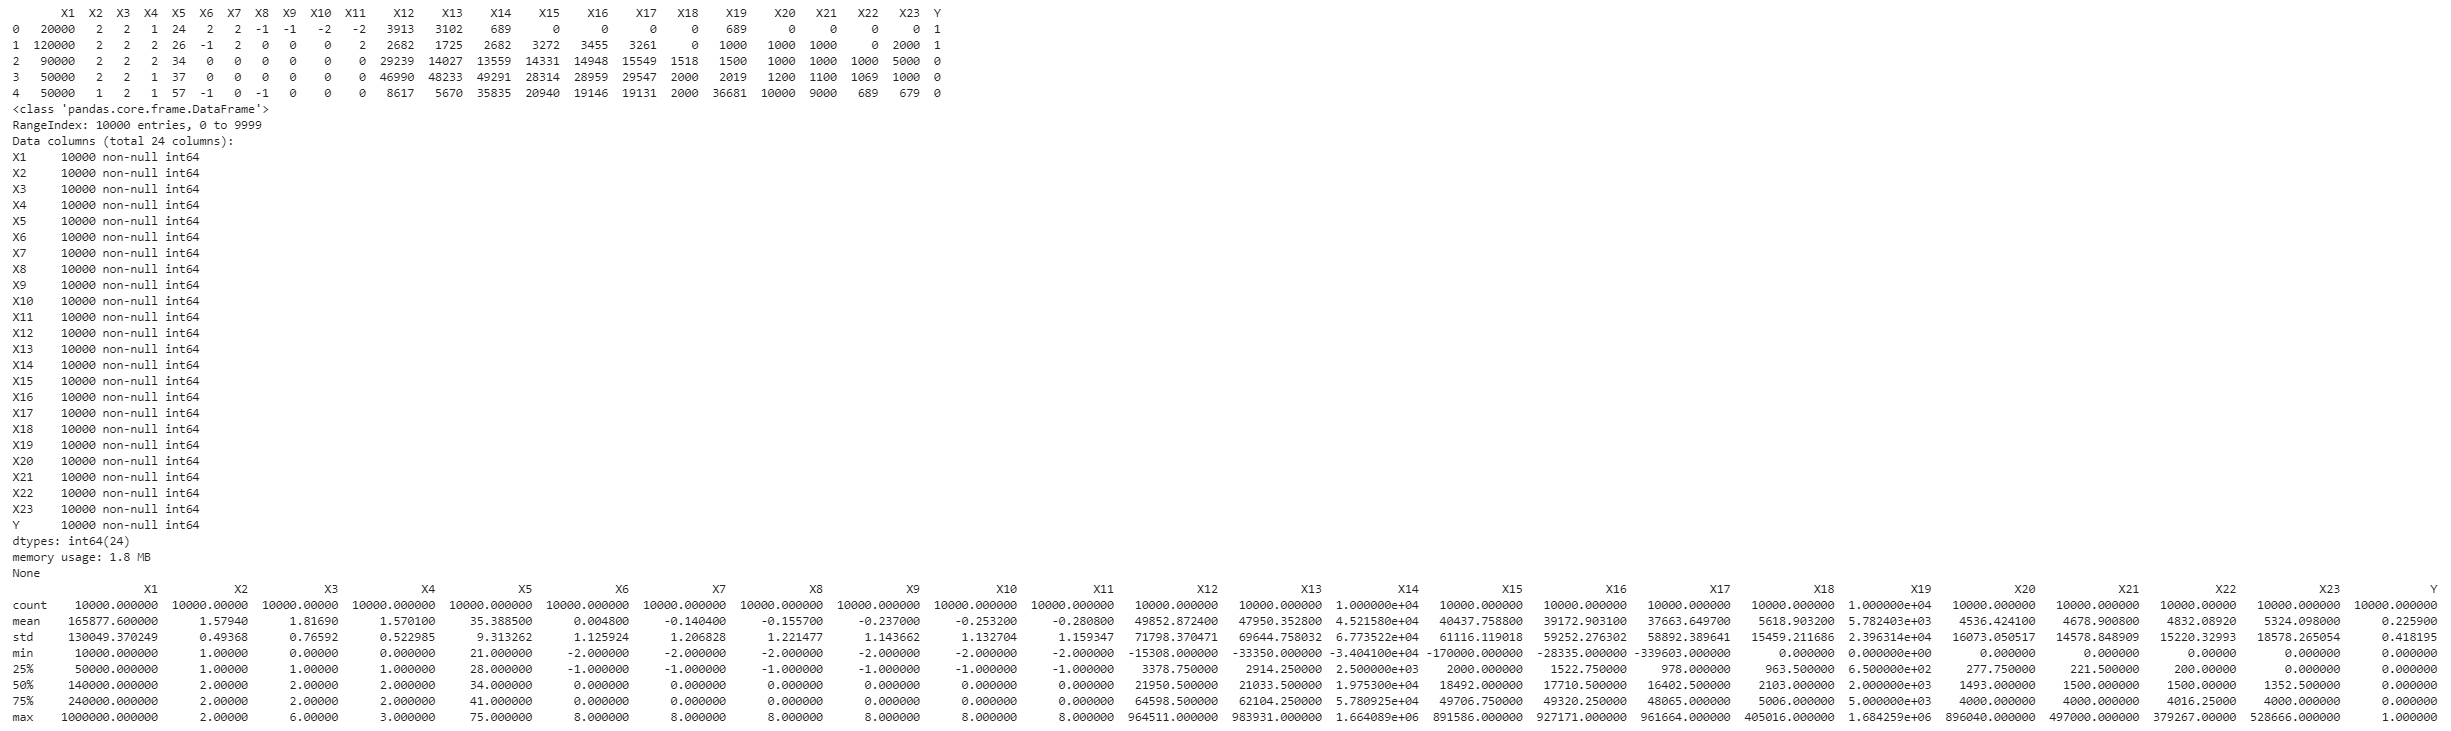

As shown above, the data consists of 23 features (X1-X23) and 1 target (Y):
* Y specifies whether a credit card account is in default.
* X1 specifies the amount of credit extended to the account.
* X2 specifies the gender of the account holder.
* X3 specifies the level of eduction of the account holder.
* X4 specifies the marital status of the account holder.
* X5 specifies the age of the account holder.
* X6-X11 specify the history of repayment status.
* X12-X17 specify the amount of past bills.
* X18-X23 specify the amount of past payments.

For more details, see the article "Predictive Accuracy of Probability of Default of Credit Card Clients", which is included in the folder containing this notebook.

### Feature Histograms

In [ ]:
creditData.hist()
plt.show()

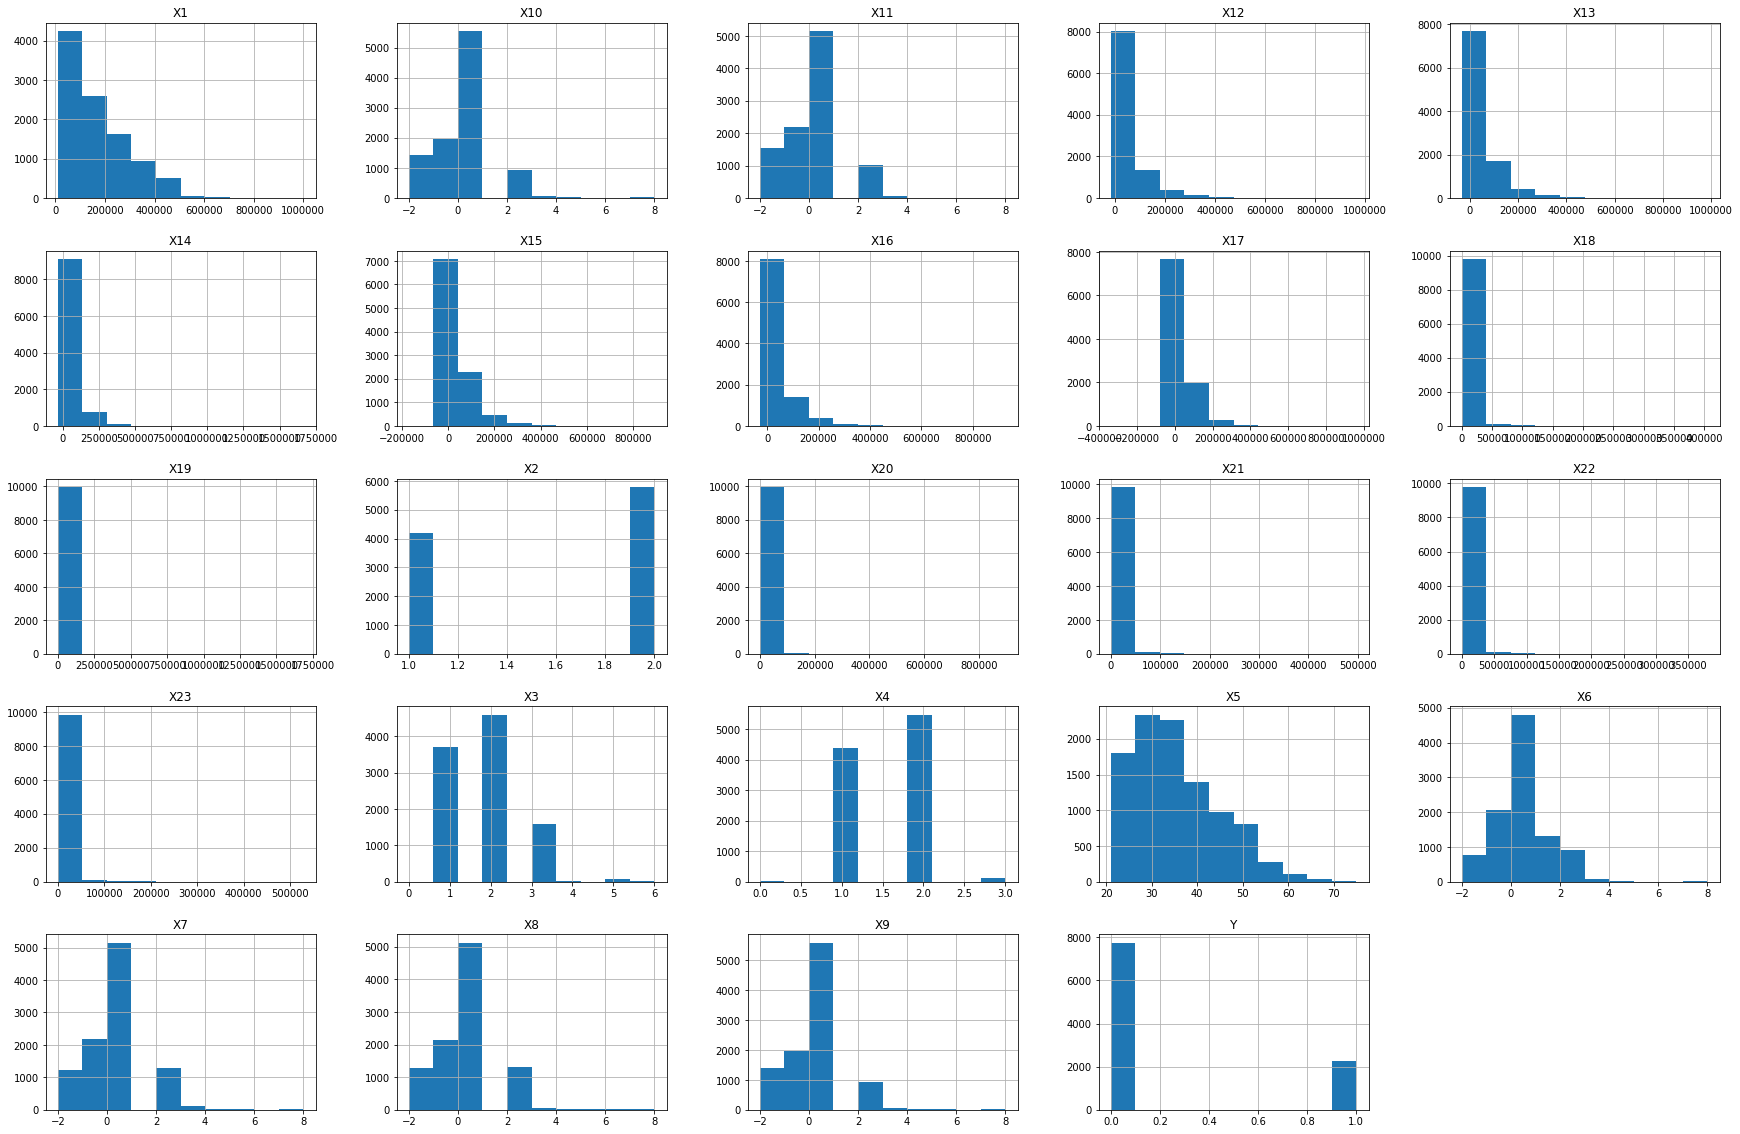

As shown above, the histograms of numeric variables such as X5 (age of account holder) contain more bins than the histograms of categorical features such as X2 (gender of account holder), as expected.

### Feature Correlations

In [ ]:
plt.matshow(creditData.corr())
plt.show()
print(creditData.corr())

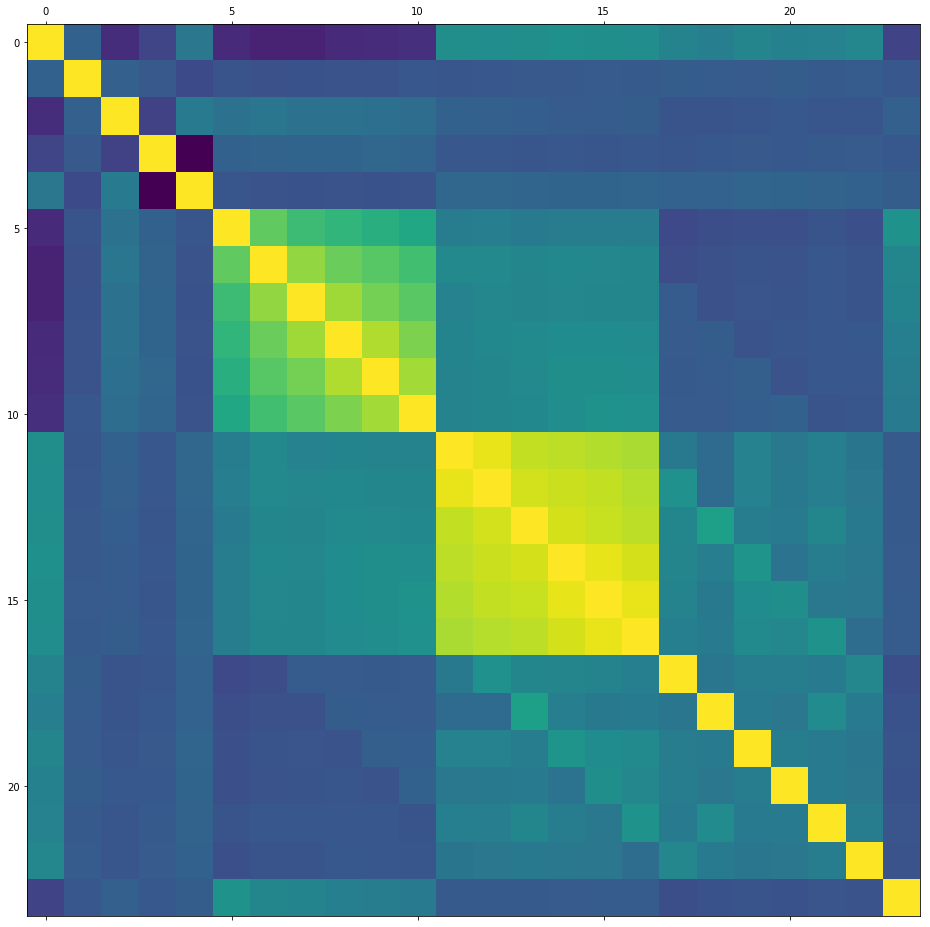

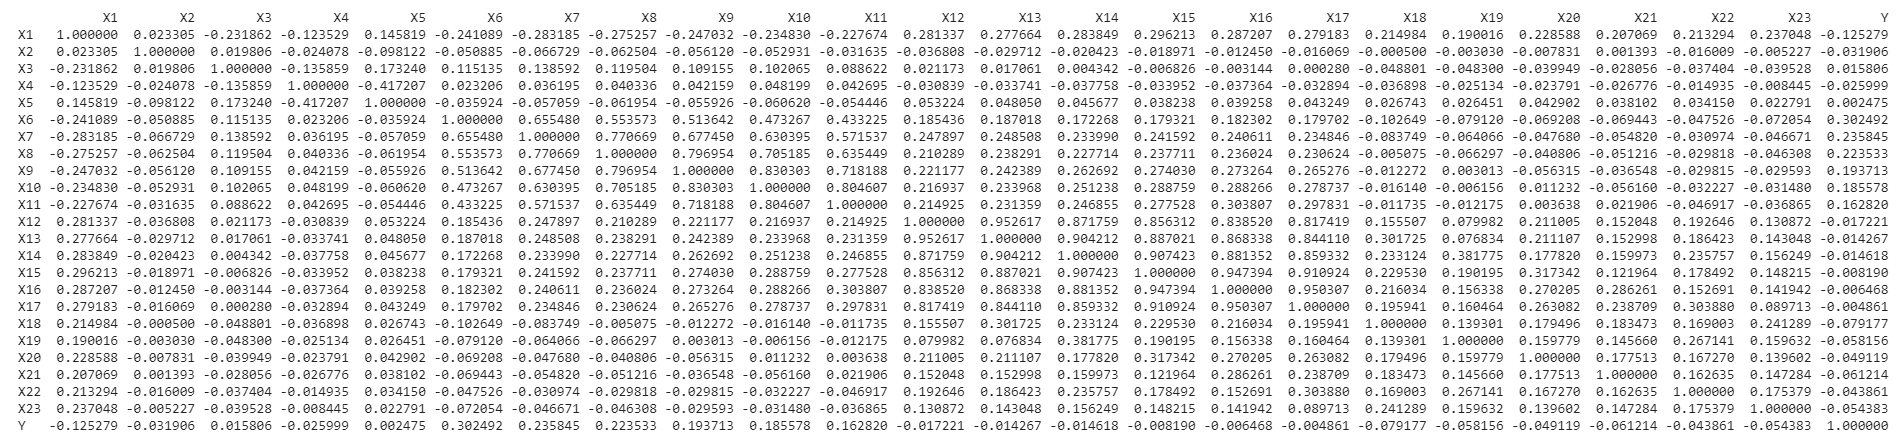

As shown above, every feature is perfectly correlated with itself, hence the ones and yellow squares on the diagonal of the correlation matrix and correlation heatmap, respectively. Interestingly, there is a large region of values close to one and colors close to yellow near the center of the heatmap. This region comprises correlations between features X12-X17, which specify the bill amounts at different times. Apparently, the bill amounts at different times are strongly correlated with each other, which is not surprising.

### Feature Scatterplots

In [ ]:
scatter_matrix(creditData)
plt.show()

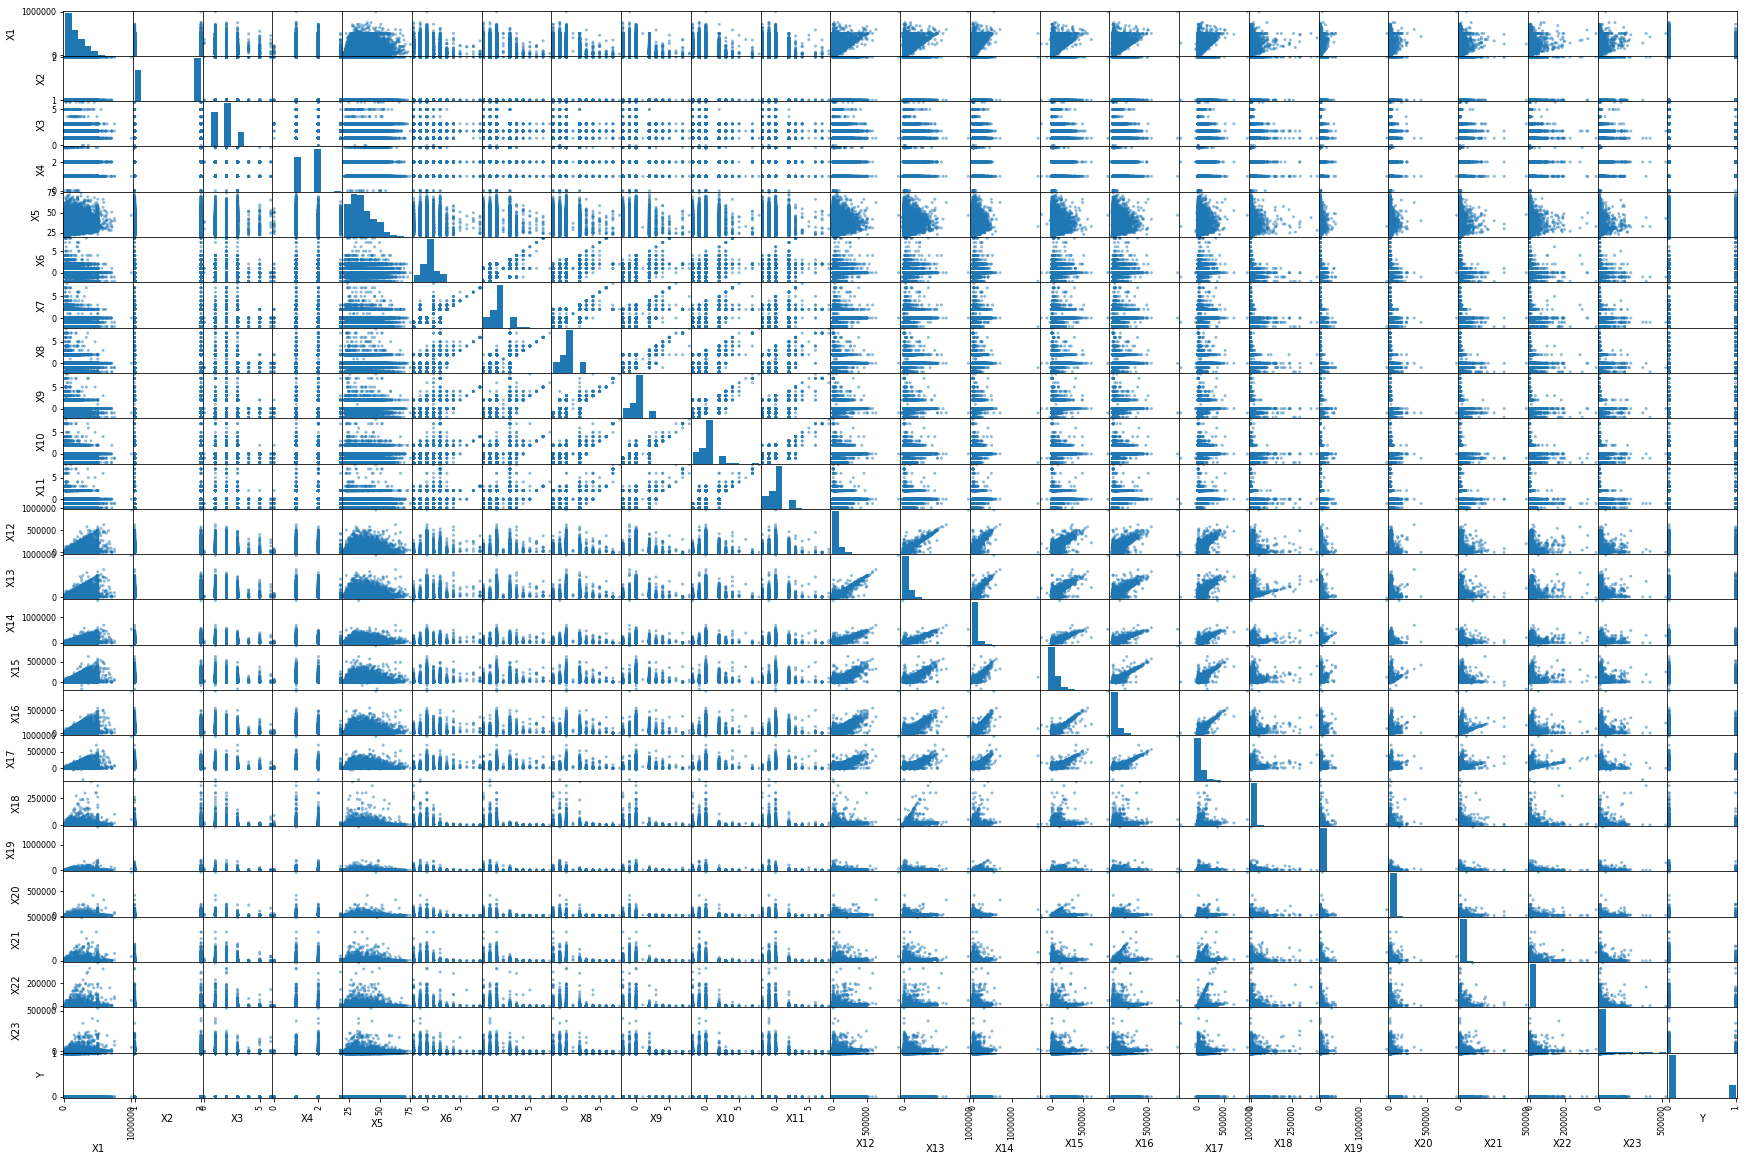

From the above, we note that:
* Scatterplots between two categorical variables (e.g. X3 and X4) often comprise a limited number of points, with clear seperation between neighboring points.
* Scatter plots between a categorical and a numeric variable (e.g. X4 and X5) often comprise limited number of vertical columns or horizonal rows of points, with clear separation between neighboring columns or rows.
* Scatter plots between two numeric variables (e.g. X5 and X12) often comprise a cloud of points, with little separation between neighboring points.
* Scatter plots between two highly correlated variables (e.g. X12 and X13) typically comprise a linear cloud of points, with little separation between neighboring points.

# H2O Models

### Install Java

In [ ]:
# Only necessary in Google Colaboratory
# ! apt-get install default-jre
# ! java -version

### Install H2O

In [ ]:
# Only necessary in Google Colaboratory
# ! pip install h2o

### Configure Environment

In [ ]:
import h2o
import matplotlib.pyplot as plt

figSize = plt.rcParams["figure.figsize"]
figSize[0] = 15
figSize[1] = 10
plt.rcParams["figure.figsize"] = figSize

h2o.init()

### Wrangle Data

In [ ]:
creditData = h2o.import_file("taiwanese_credit_data_medium_sample.csv")
creditData['Y'] = h2o.H2OFrame.asfactor(creditData['Y'])
creditData.describe()

trainData, testData = creditData.split_frame([0.8])

xCols = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12',
         'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']
yCols = 'Y'

As shown above, a relatively small amount of data wrangling, comprising 6 lines of code, was required to make the data suitable for building H2O models.

## Logistic Regression Model

### Train Model

In [ ]:
logRegModel = h2o.estimators.H2OGeneralizedLinearEstimator(family='binomial')
logRegModel.train(x=xCols, y=yCols, training_frame=trainData, validation_frame=testData)

print("Logistic Regression AUC:", logRegModel.auc(train=True))
logRegPerf = logRegModel.model_performance(train=True)
logRegPerf.plot(type='roc')
plt.show()

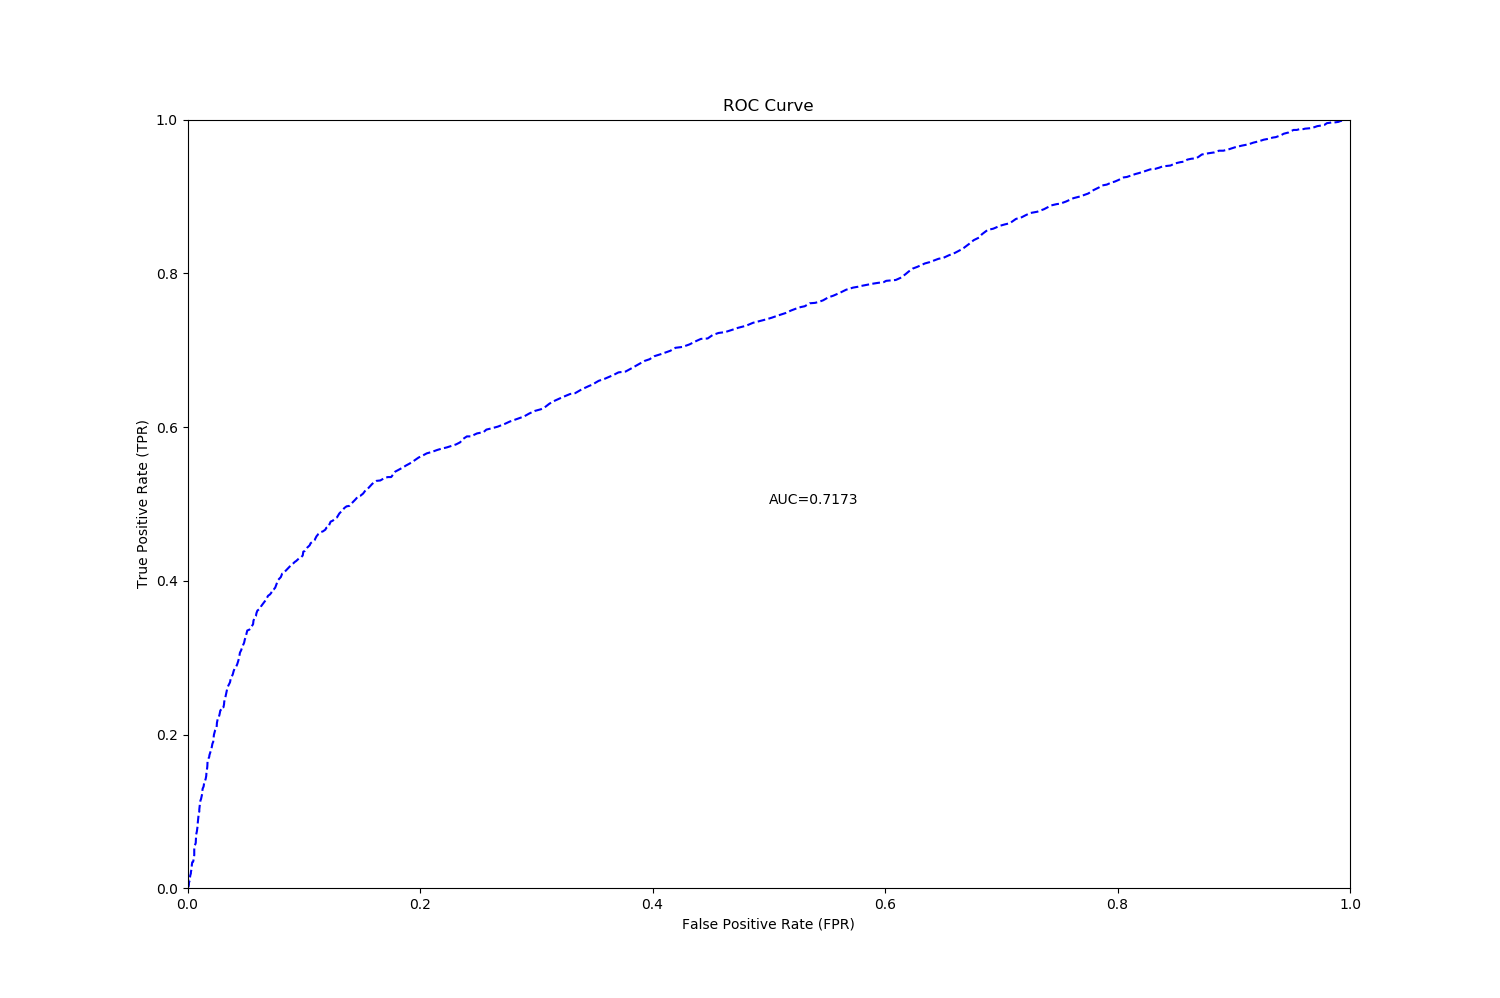

As shown in the above plot of the ROC curve, the H2O logistic regression model achieved an AUC of 0.7173 with the training data.

### Test Model

In [ ]:
print("Logistic Regression AUC:", logRegModel.auc(valid=True))
logRegPerf = logRegModel.model_performance(valid=True)
logRegPerf.plot(type='roc')
plt.show()

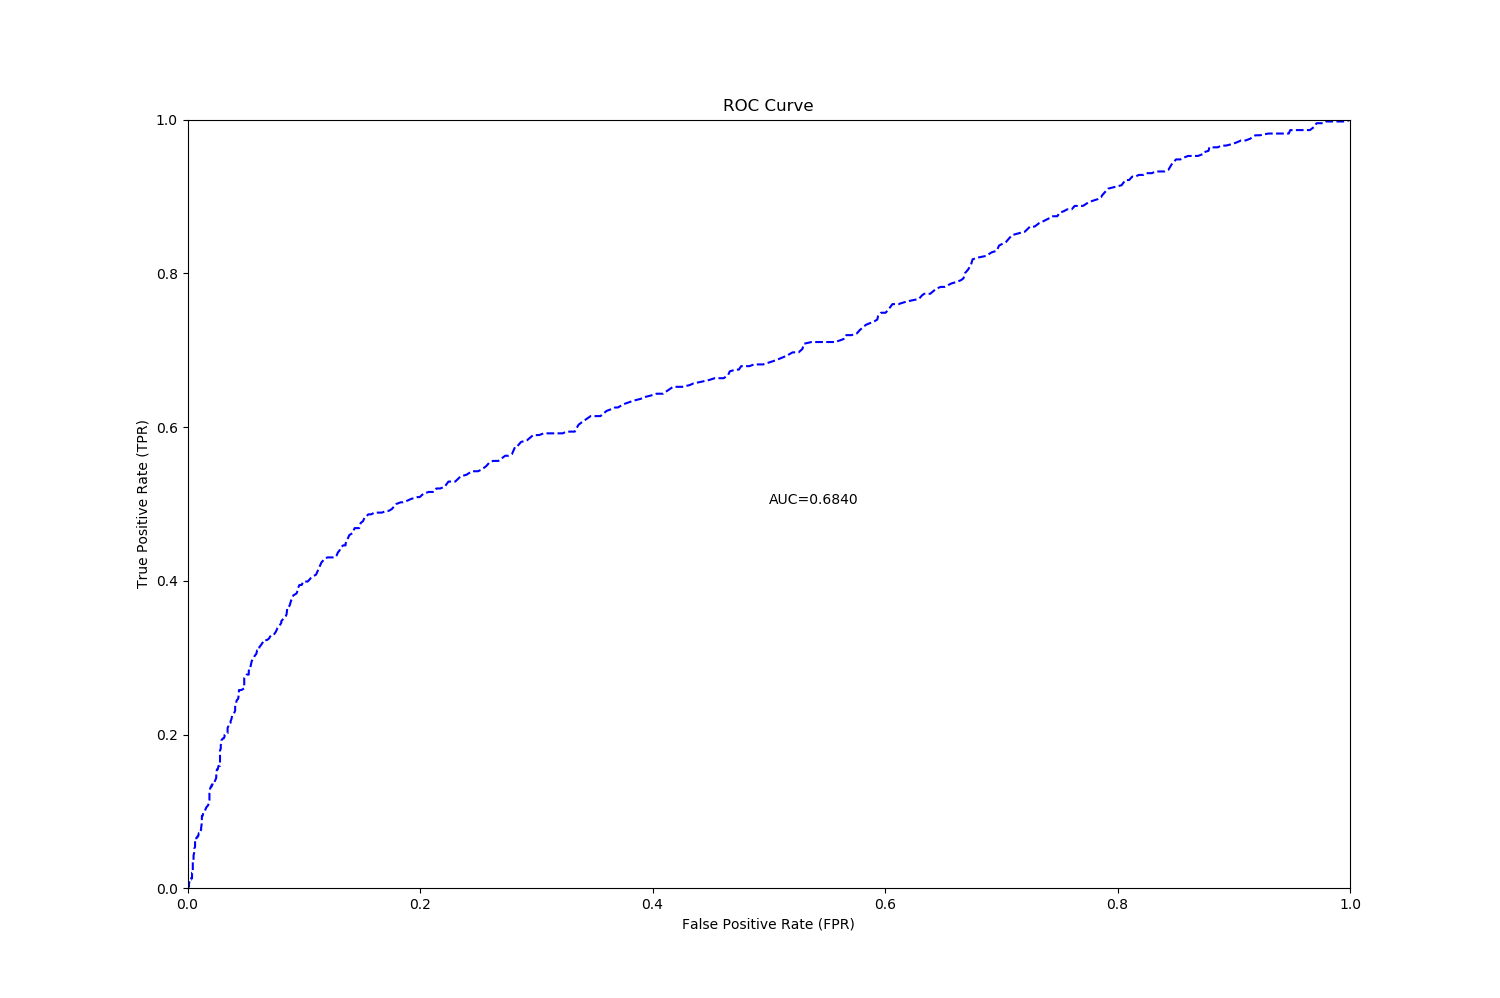

As shown in the above plot of the ROC curve, the H2O logistic regression model achieved an AUC of 0.6840 with the test data.

## Gradient Boosting Model

### Train Model

In [ ]:
gradBoostModel = h2o.estimators.H2OGradientBoostingEstimator()
gradBoostModel.train(x=xCols, y=yCols, training_frame=trainData, validation_frame=testData)

print("Gradient Boosting AUC:", gradBoostModel.auc(train=True))
gradBoostPerf = gradBoostModel.model_performance(train=True)
gradBoostPerf.plot(type='roc')
plt.show()

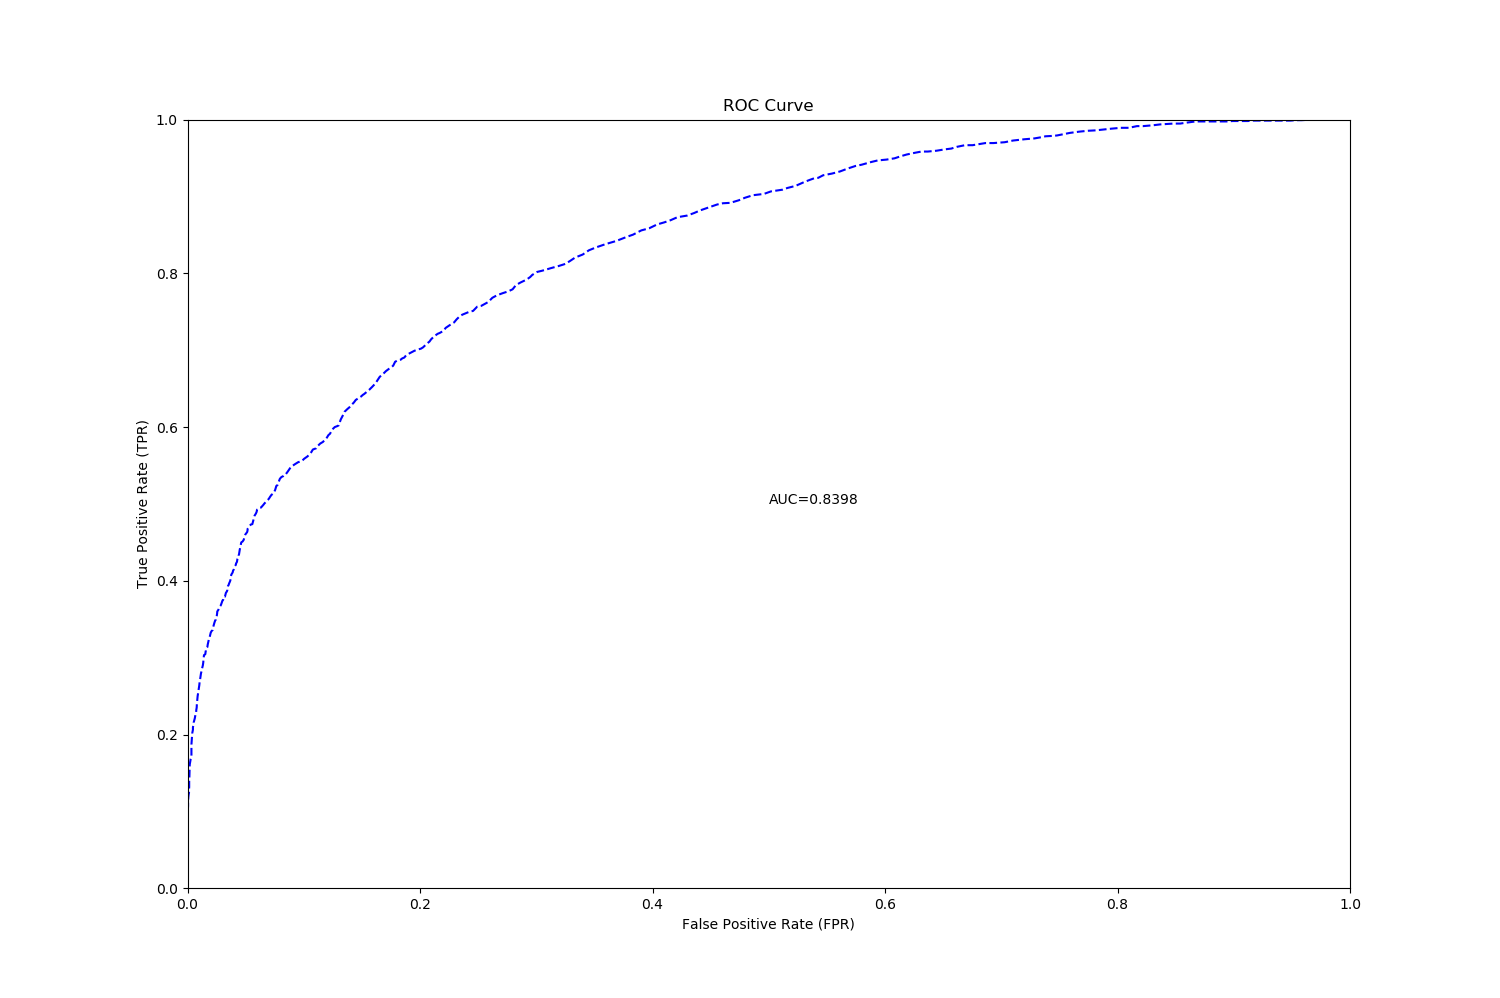

As shown in the above plot of the ROC curve, the H2O gradient boosting model achieved an AUC of 0.8398 with the training data.

### Test Model

In [ ]:
print("Gradient Boosting AUC:", gradBoostModel.auc(valid=True))
gradBoostPerf = gradBoostModel.model_performance(valid=True)
gradBoostPerf.plot(type='roc')
plt.show()

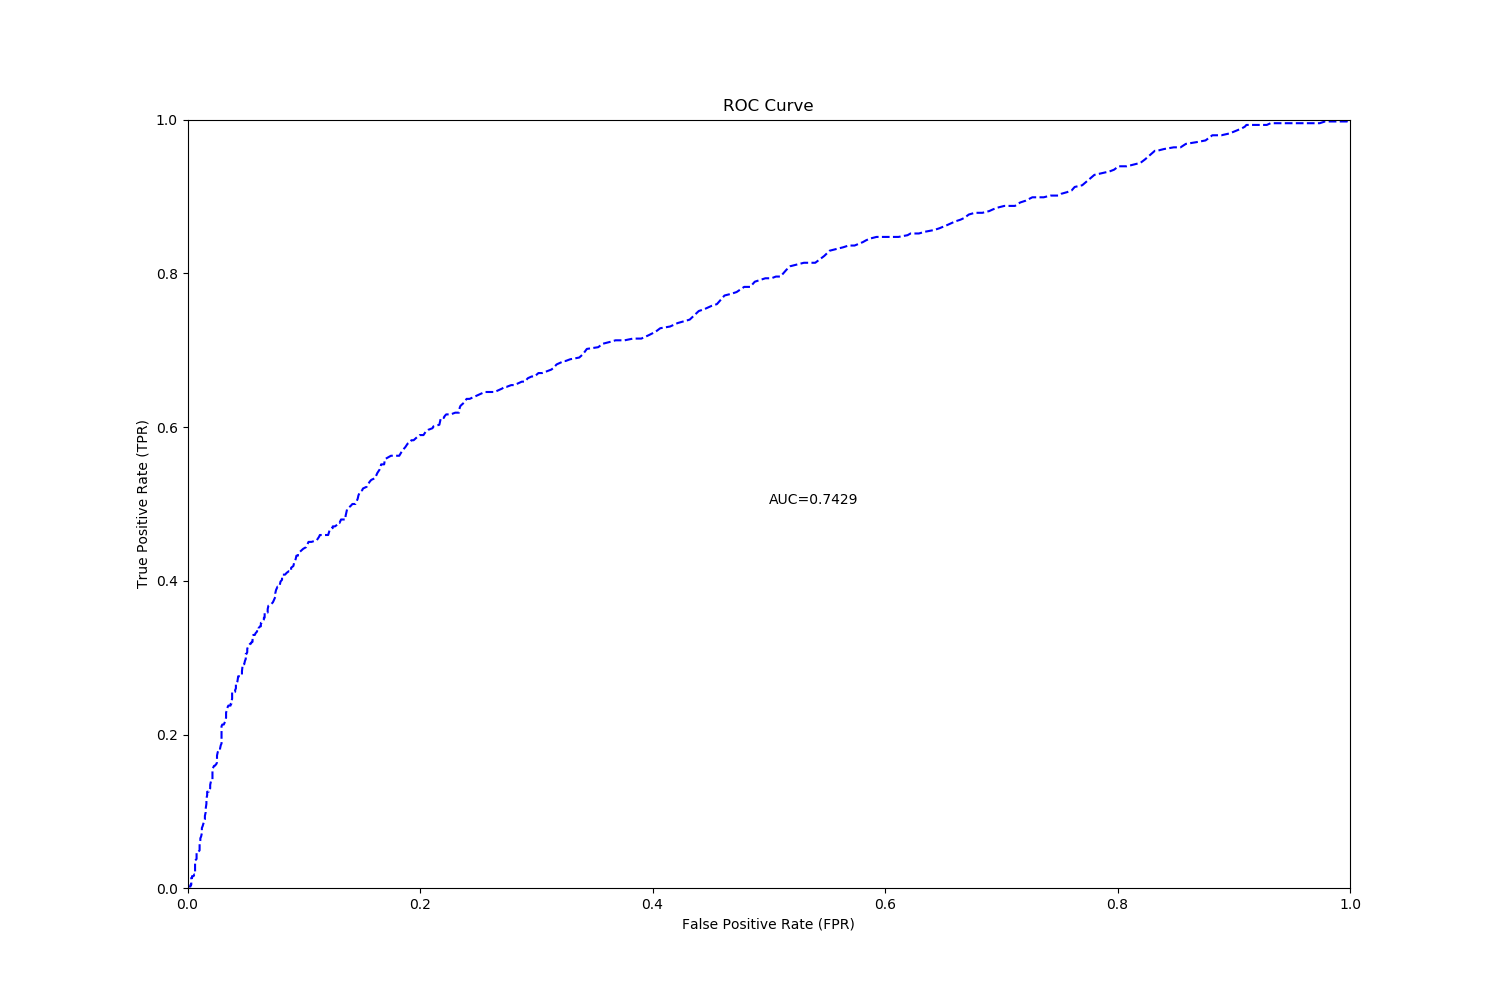

As shown in the above plot of the ROC curve, the H2O gradient boosting model achieved an AUC of 0.7429 with the test data.

## Deep Learning Model

### Train Model

In [ ]:
deepLearnModel = h2o.estimators.H2ODeepLearningEstimator()
deepLearnModel.train(x=xCols, y=yCols, training_frame=trainData, validation_frame=testData)

print("Deep Learning AUC:", deepLearnModel.auc(train=True))
deepLearnPerf = deepLearnModel.model_performance(train=True)
deepLearnPerf.plot(type='roc')
plt.show()

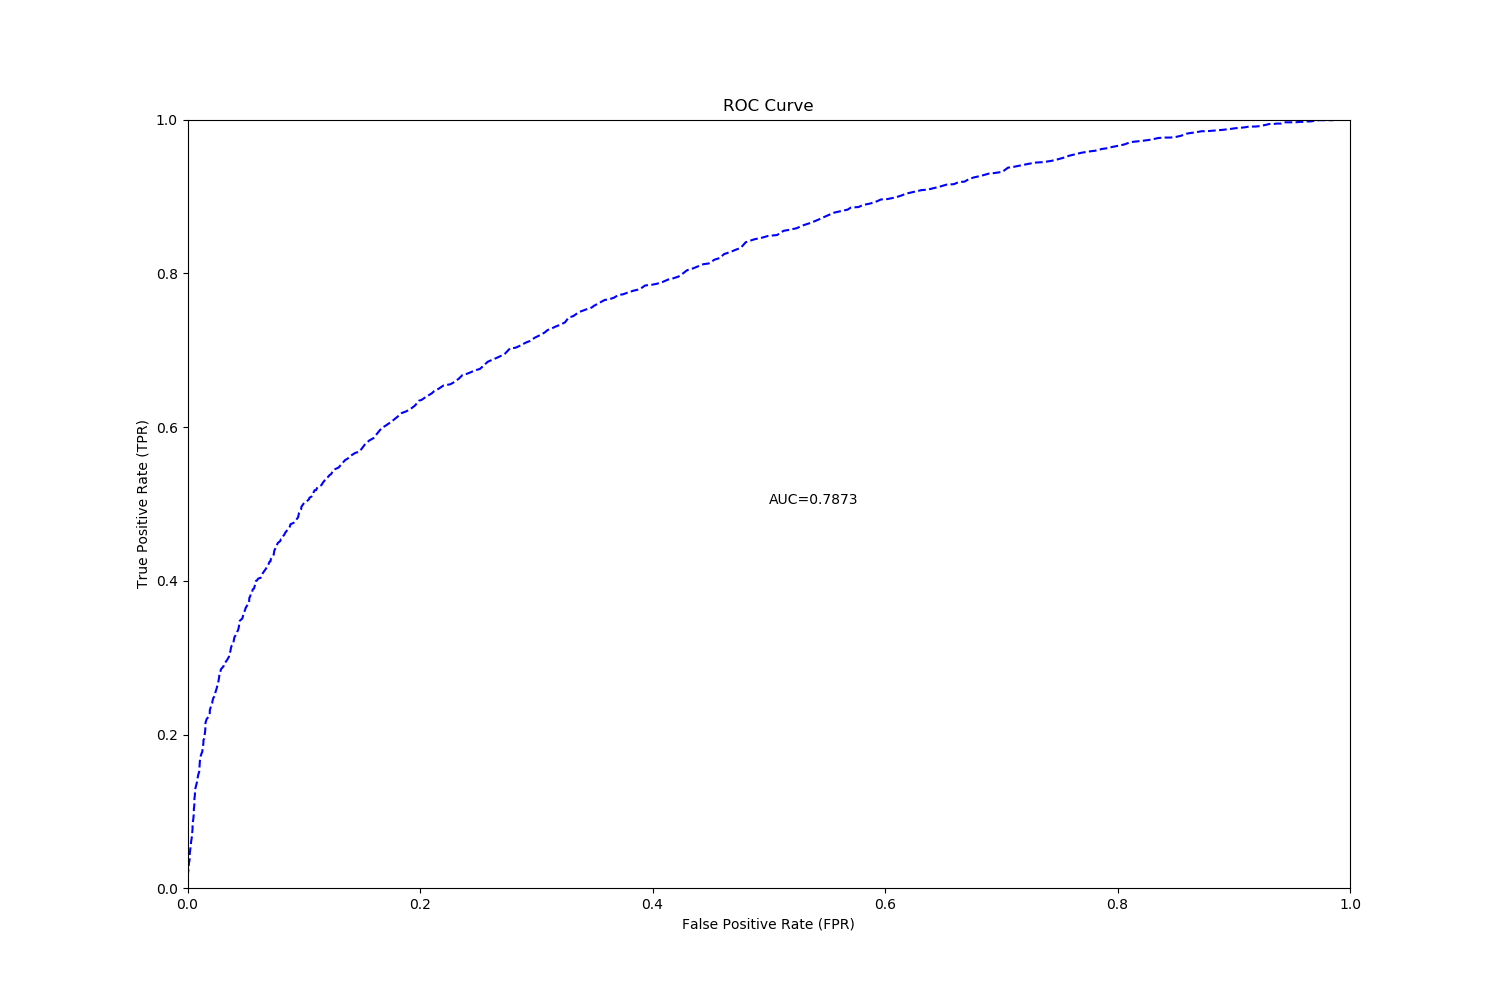

As shown in the above plot of the ROC curve, the H2O deep learning model achieved an AUC of 0.7873 with the training data.

### Test Model

In [ ]:
print("Deep Learning AUC:", deepLearnModel.auc(valid=True))
deepLearnPerf = deepLearnModel.model_performance(valid=True)
deepLearnPerf.plot(type='roc')
plt.show()

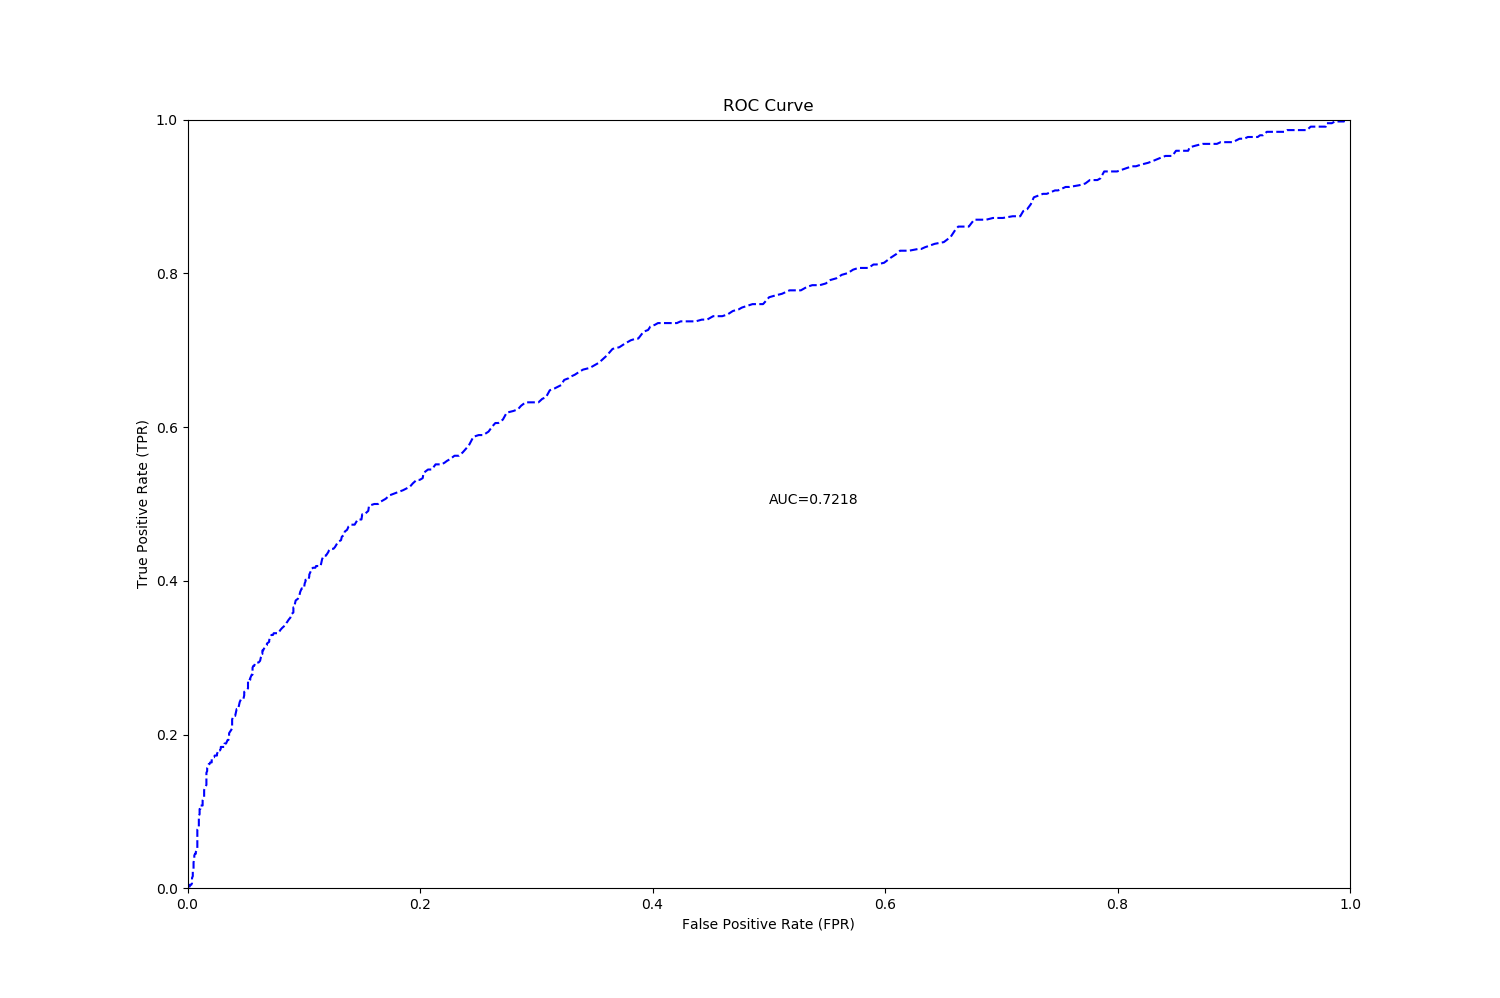

As shown in the above plot of the ROC curve, the H2O deep learning model achieved an AUC of 0.7218 with the test data.

# TensorFlow Models

### Configure Environment

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

figSize = plt.rcParams["figure.figsize"]
figSize[0] = 15
figSize[1] = 10
plt.rcParams["figure.figsize"] = figSize

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

### Wrangle Data

In [ ]:
creditData = pd.read_csv("taiwanese_credit_data_medium_sample.csv")
outCols = ['Y']
numCols = ['X1', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']
catCols = ['X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']

outVars = creditData[outCols]
# print("\noutVars:\n", outVars.tail())

numVars = creditData[numCols]
# print("\nnumVars:\n", numVars.tail())

catVars = creditData[catCols].astype('category')
# print("\ncatVars:\n", catVars.tail())

dumVars =  pd.get_dummies(catVars)
# print("\ndumVars:\n", dumVars.tail())

x = pd.concat([numVars, dumVars, outVars], axis=1)
# print("\nx:\n", x.tail())

xTrain = x.sample(frac=0.8, random_state=0)
xTest = x.drop(xTrain.index)
xTrain = xTrain.reset_index(drop=True)
xTest = xTest.reset_index(drop=True)
yTrain, yTest = xTrain.pop('Y'), xTest.pop('Y')

# print("\nxTrain:\n", xTrain.tail())
# print("\nyTrain:\n", yTrain.tail())

# print("\nxTest:\n", xTest.tail())
# print("\nyTest:\n", yTest.tail())

featureColumns = xTrain.columns.tolist()
# print("\nfeatureColumns:\n", featureColumns)

features = [tf.feature_column.numeric_column(feature) for feature in featureColumns]
# print("\nfeatures:\n", features)

numObs = len(yTrain)

As shown above, a relatively large amount of data wrangling, comprising 17 lines of code, was required to make the data suitable for building TensorFlow models. In contrast, a relatively small amount of data wrangling, comprising only 6 lines of code, was required for the H2O models.

## Define Functions

### TensorFlow Input Functions

In [ ]:
def input_func(x, y, n_epochs=None, shuffle=True):
    def form_input():
        dataset = tf.data.Dataset.from_tensor_slices((dict(x), y))
        if shuffle:
            dataset = dataset.shuffle(numObs)
        dataset = dataset.repeat(n_epochs)
        dataset = dataset.batch(numObs)
        return dataset
    return form_input

train_input_func = input_func(xTrain, yTrain)
train_input_func_1 = input_func(xTrain, yTrain, shuffle=False, n_epochs=1)
test_input_func = input_func(xTest, yTest, shuffle=False, n_epochs=1)

numBatches = 1

As shown above, input functions needed to be defined to feed the training and test data to the TensorFlow models. No comparable functions needed to be defined for the H2O models.

### ROC Plotting Function

In [ ]:
def plot_roc(yTrain, predProbs, auc):
    fpr, tpr, _ = roc_curve(yTrain, predProbs)
    plt.plot(fpr, tpr)
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    annotation = 'AUC=' + str(auc)
    plt.annotate(annotation, xy=(0.6, 0.3), xycoords='data')
    plt.xlim(0, )
    plt.ylim(0, )
    plt.show()

As shown above, a function needed to be defined to plot the ROC curves for the TensorFlow models. No comparable function needed to be defined for the H2O models, as a comparable function is included with the H2O package.

## Logistic Regression

### Train Model

In [ ]:
logRegModel = tf.estimator.LinearClassifier(feature_columns=features)
logRegModel.train(input_fn=train_input_func, max_steps=1000)

logRegResults = logRegModel.evaluate(input_fn=train_input_func_1)
auc = logRegResults['auc']
print('Logistic Regression AUC: ', auc)

predDicts = list(logRegModel.predict(train_input_func_1))
predProbs = pd.Series([prediction['probabilities'][1] for prediction in predDicts])
plot_roc(yTrain, predProbs, auc)

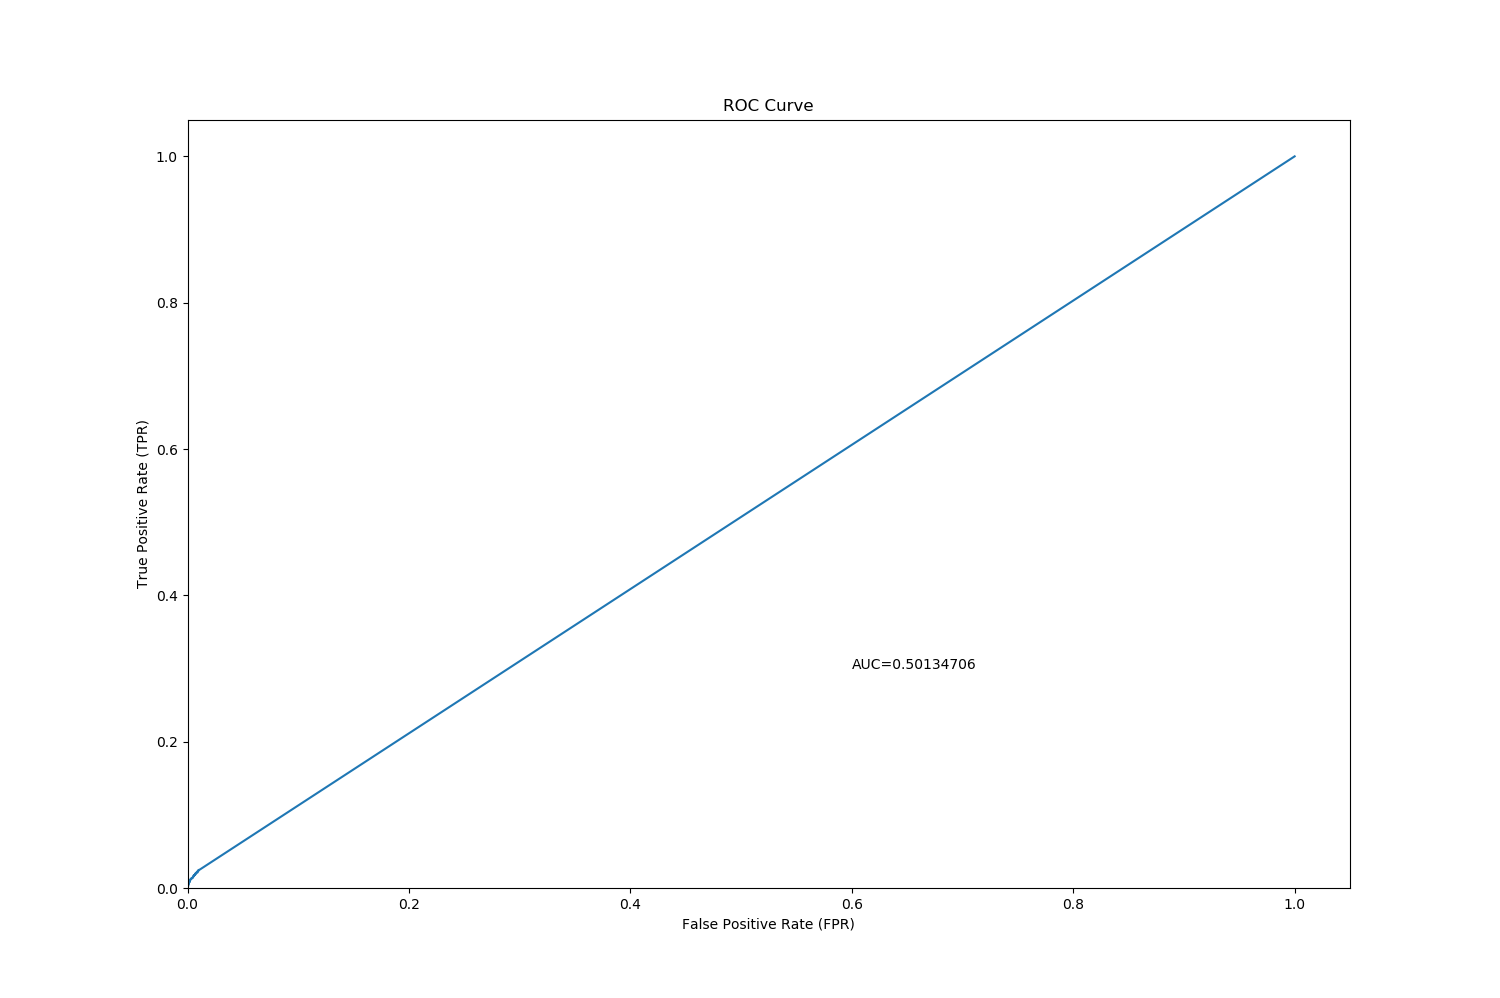

As shown in the above plot of the ROC curve, the TensorFlow logistic regression model achieved an AUC of 0.5013 with the training data.

### Test Model

In [ ]:
logRegResults = logRegModel.evaluate(input_fn=test_input_func)
auc = logRegResults['auc']
print('Logistic Regression AUC: ', auc)

predDicts = list(logRegModel.predict(test_input_func))
predProbs = pd.Series([prediction['probabilities'][1] for prediction in predDicts])
plot_roc(yTest, predProbs, auc)

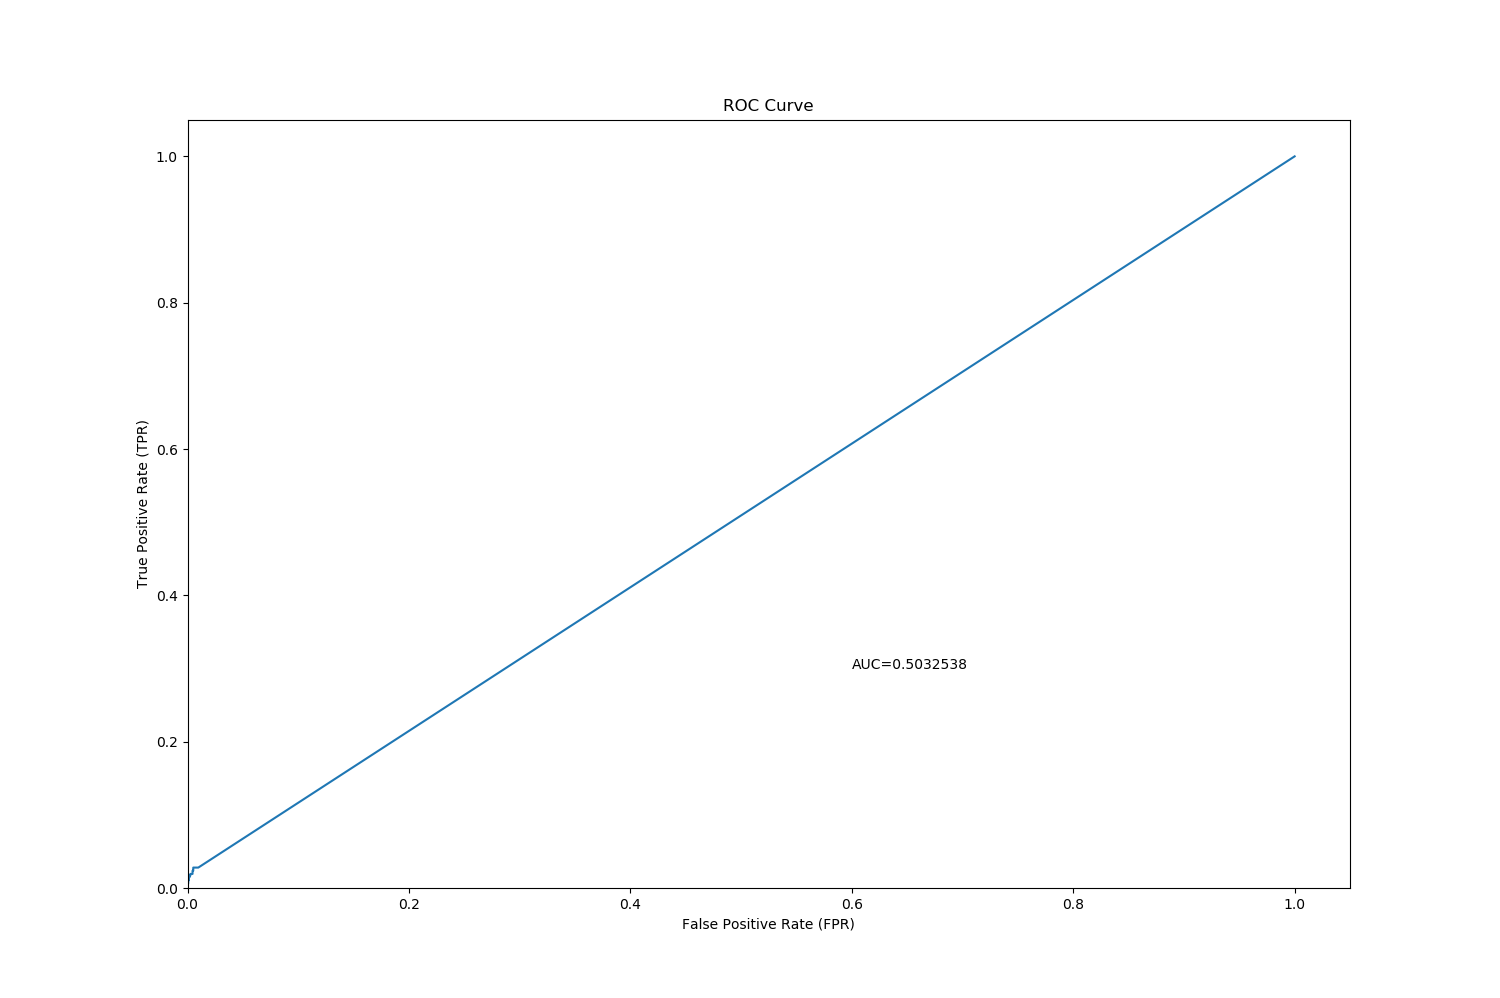

As shown in the above plot of the ROC curve, the TensorFlow logistic regression model achieved an AUC of 0.5032 with the test data.

## Gradient Boosting

### Train Model

In [ ]:
gradBoostModel = tf.estimator.BoostedTreesClassifier(feature_columns=features, n_batches_per_layer=numBatches)
gradBoostModel.train(input_fn=train_input_func, max_steps=200)

gradBoostResults = gradBoostModel.evaluate(input_fn=train_input_func_1)
auc = gradBoostResults['auc']
print('Gradient Boosting AUC: ', auc)

predDicts = list(gradBoostModel.predict(train_input_func_1))
predProbs = pd.Series([prediction['probabilities'][1] for prediction in predDicts])
plot_roc(yTrain, predProbs, auc)

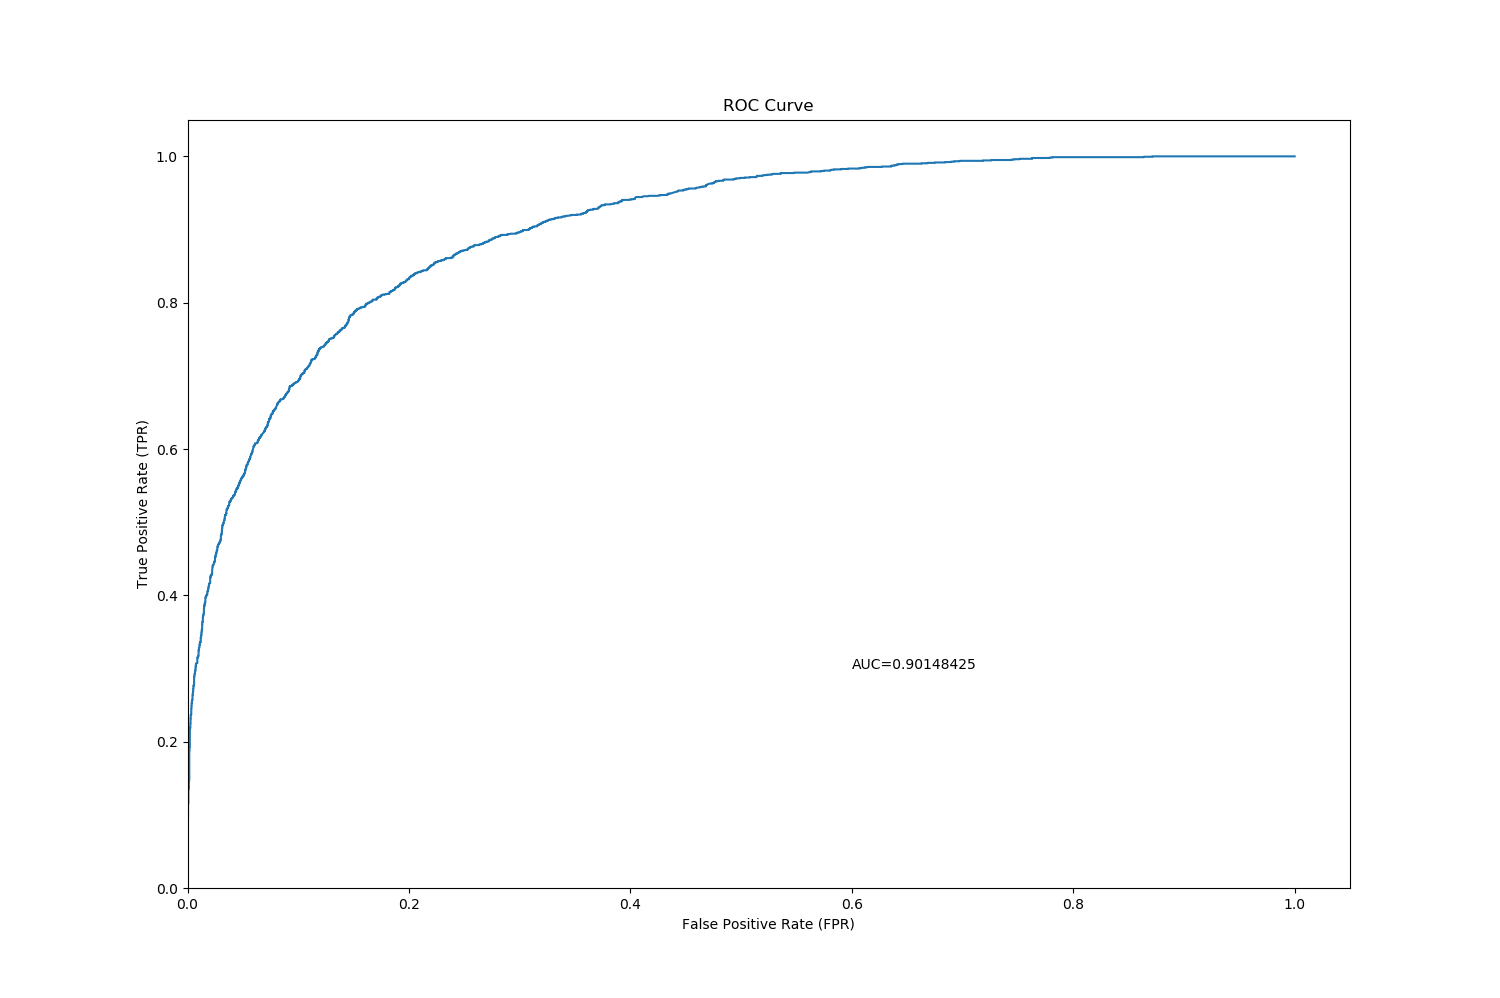

As shown in the above plot of the ROC curve, the TensorFlow gradient boosting model achieved an AUC of 0.9015 with the training data.

### Test Model

In [ ]:
gradBoostResults = gradBoostModel.evaluate(input_fn=test_input_func)
auc = gradBoostResults['auc']
print('Gradient Boosting AUC: ', auc)

predDicts = list(gradBoostModel.predict(test_input_func))
predProbs = pd.Series([prediction['probabilities'][1] for prediction in predDicts])
plot_roc(yTest, predProbs, auc)

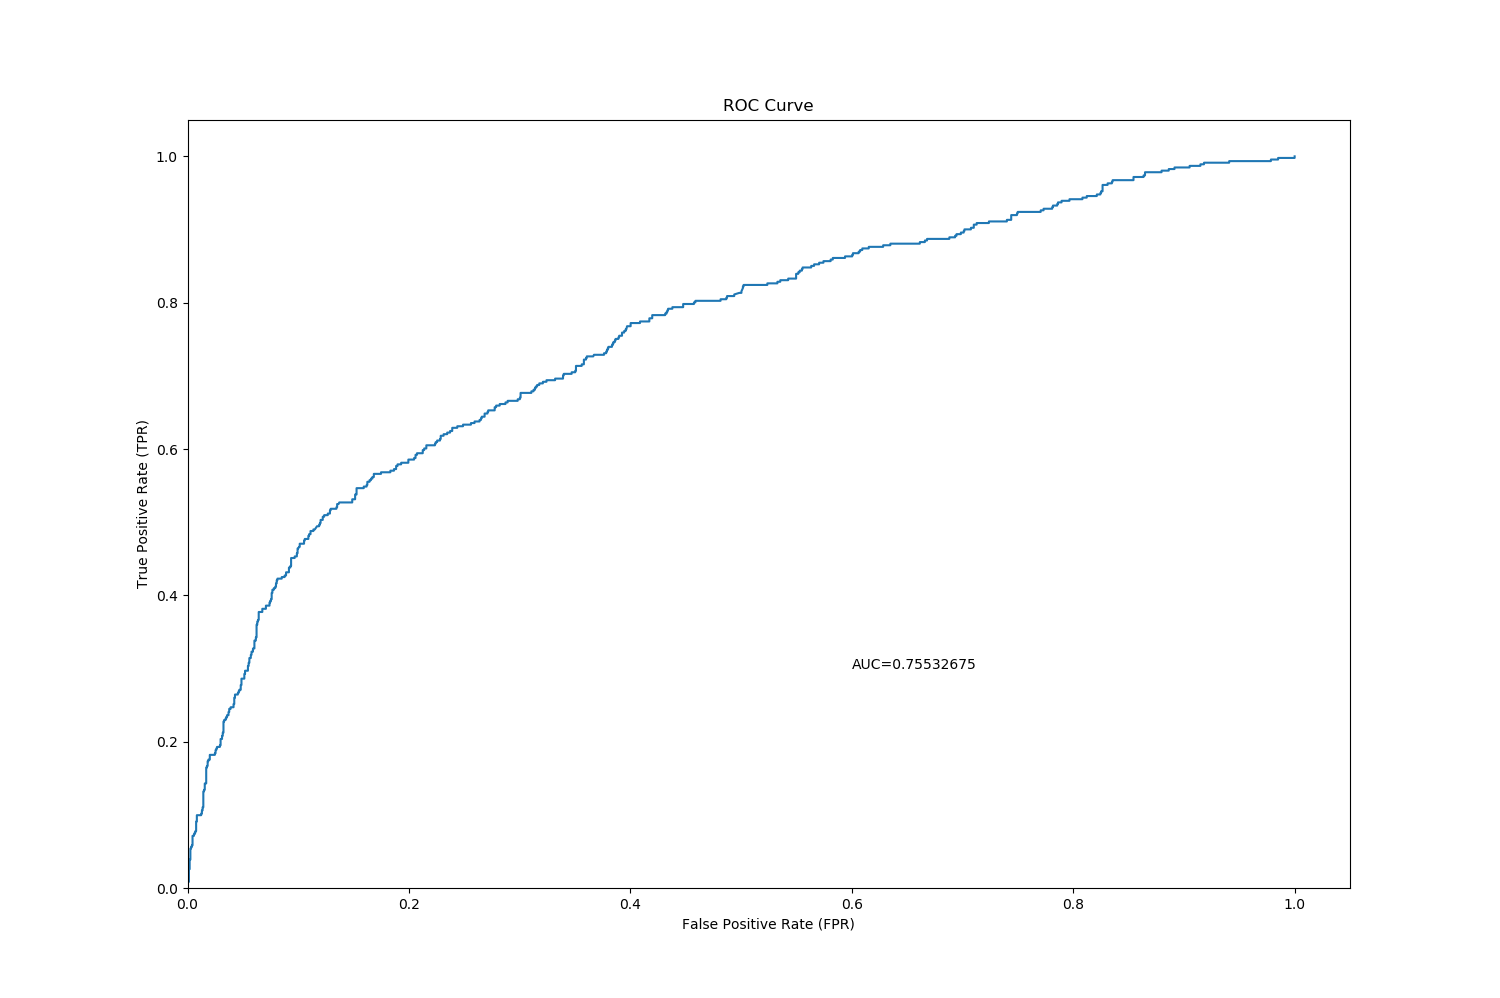

As shown in the above plot of the ROC curve, the TensorFlow gradient boosting model achieved an AUC of 0.7553 with the test data.

## Deep Learning

### Train Model

In [ ]:
# optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
# optimizer = tf.train.ProximalAdagradOptimizer(learning_rate=0.2)
# deepLearnModel = tf.estimator.DNNClassifier(feature_columns=features,
#                                             hidden_units=[200, 200],
#                                             optimizer=optimizer,
#                                             n_classes=2)
deepLearnModel = tf.estimator.DNNClassifier(feature_columns=features, hidden_units=[200, 200], n_classes=2)
deepLearnModel.train(input_fn=train_input_func, max_steps=2000)

deepLearnResults = deepLearnModel.evaluate(input_fn=train_input_func_1)
auc = deepLearnResults['auc']
print('Deep Learning AUC: ', auc)

predDicts = list(deepLearnModel.predict(train_input_func_1))
predProbs = pd.Series([prediction['probabilities'][1] for prediction in predDicts])
plot_roc(yTrain, predProbs, auc)

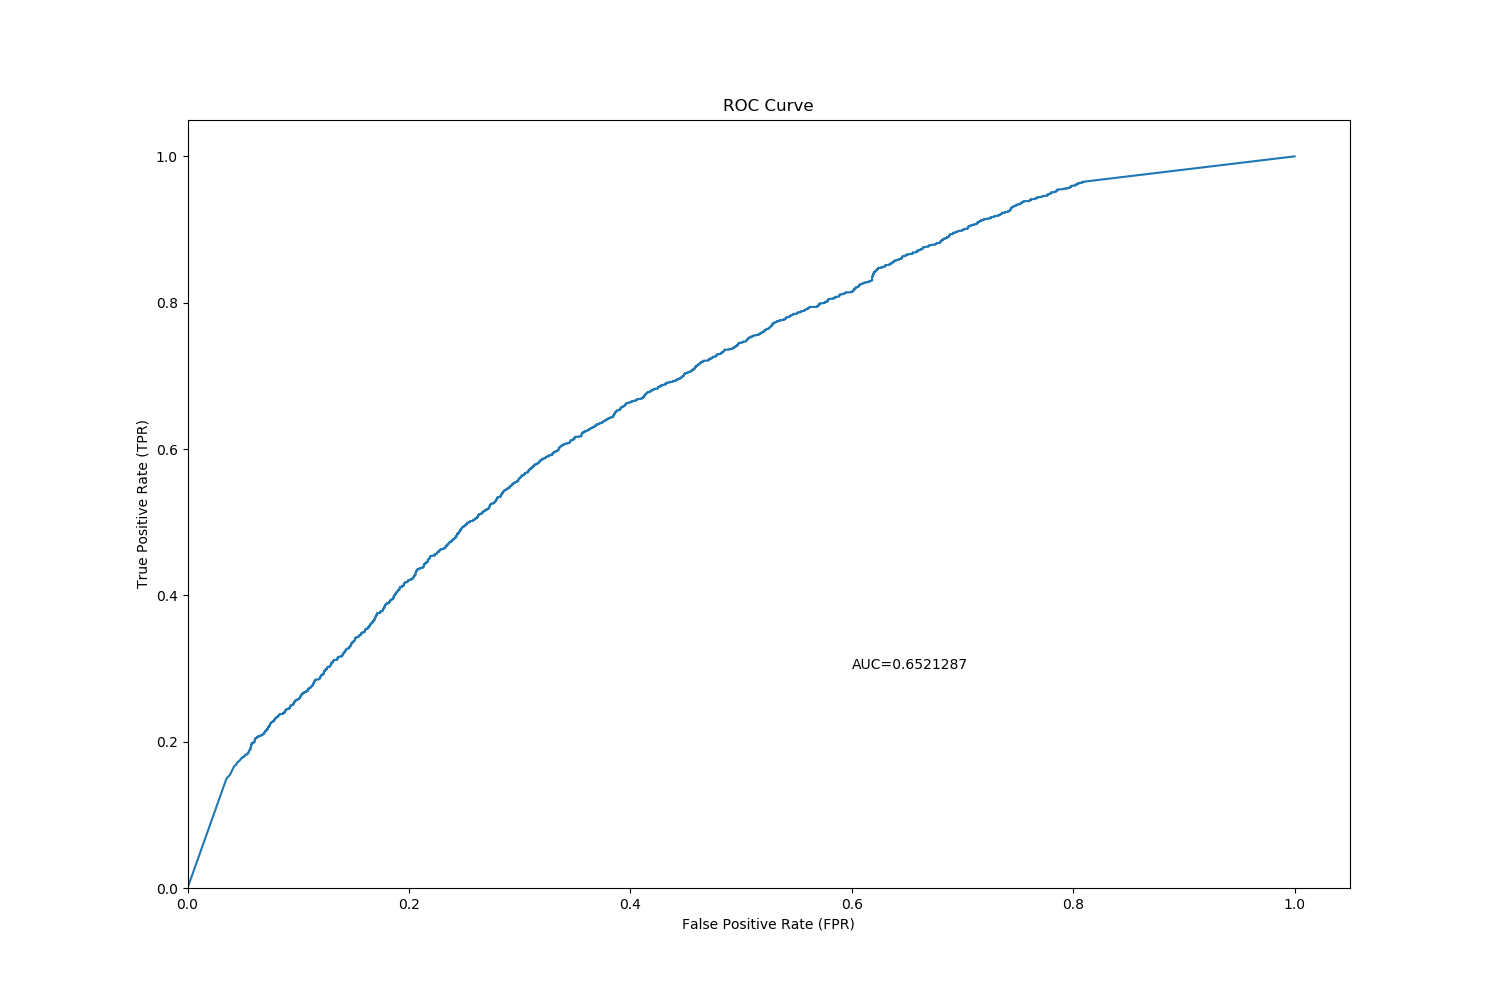

As shown in the above plot of the ROC curve, the TensorFlow deep learning model achieved an AUC of 0.6521 with the training data.

### Test Model

In [ ]:
deepLearnResults = deepLearnModel.evaluate(input_fn=test_input_func)
auc = deepLearnResults['auc']
print('Deep Learning AUC: ', auc)

predDicts = list(deepLearnModel.predict(test_input_func))
predProbs = pd.Series([prediction['probabilities'][1] for prediction in predDicts])
plot_roc(yTest, predProbs, auc)

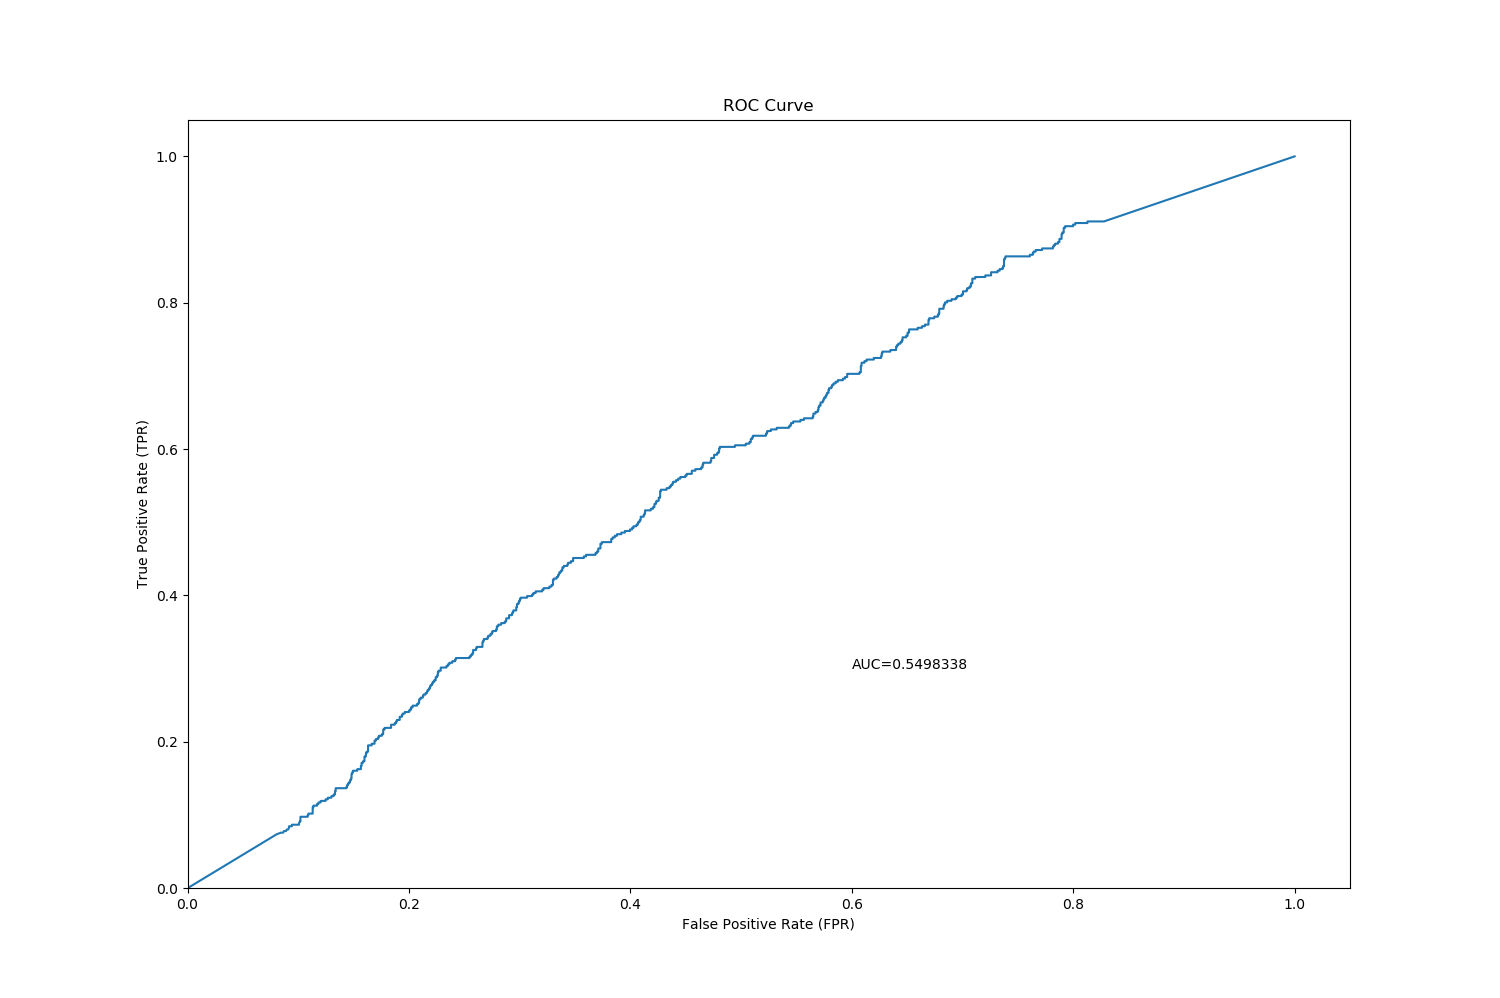

As shown in the above plot of the ROC curve, the TensorFlow deep learning model achieved an AUC of 0.5498 with the test data.

# Conclusion
As shown below, the H2O models perform better than the TensorFlow models. The gradient boosting models perform better than the deep learning and logistic regression models.

Based on anecdotal observation, the H2O models were easier to program and faster to run than the TensorFlow models.

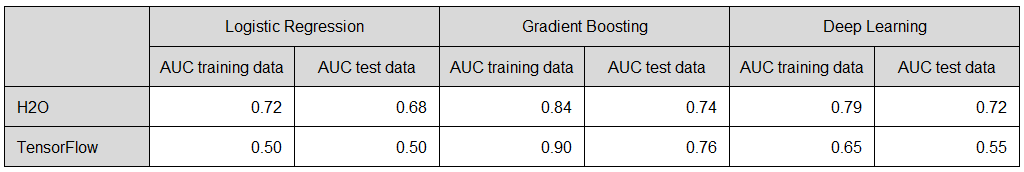